# Introduction to Quantitative Finance

Copyright (c) 2019 Python Charmers Pty Ltd, Australia, <https://pythoncharmers.com>. All rights reserved.

<img src="img/python_charmers_logo.png" width="300" alt="Python Charmers Logo">

Published under the Creative Commons Attribution-NonCommercial 4.0 International (CC BY-NC 4.0) license. See `LICENSE.md` for details.

Sponsored by Tibra Global Services, <https://tibra.com>

<img src="img/tibra_logo.png" width="300" alt="Tibra Logo">


## Module 1.3: Ordinary Least Squares

### 1.3.1 Ordinary Least Squares

The Ordinary Least Squares (hereafter OLS) algorithm is a key algorithm for prediction, regression and many other learning tasks. Despite it initially looking like *just* a linear algorithm, it can be extended to be able to predict a wide variety of complex tasks. It is a powerful algorithm with some solid mathematical proofs behind it, and is a very practically useful algorithm for prediction and modelling tasks.

We will review the OLS algorithm in significant depth over the next few notebooks, and use it extensively over the rest of this course.
The OLS algorithm aims to solve problems of the form:

$ Y = X\beta + \boldsymbol{u}$

Where:
* $Y$ is the variable we are attempting to predict (the dependent variable)
* $X$ is our independent variable (or multiple variables, as we will see in the next notebook)
* $\beta$ is the parameters we are trying to learn
* $u$ is the error of our model, as we can often not predict data perfectly.

This type of model is a **Linear Regression Model**, as the model is a linear combination of $X$ and $\beta$. Note, however, that the values of $X$ do not have to be linear, for instance, we can used $x^2$ as our $X$ value, and we still use Linear Regression to learn that model (although in some cases it may no longer be the best algorithm - a problem for later). We use OLS to find the best values for $\beta$ for our Linear Regression Model.

OLS aims to learn the *best* values for $\beta$, which is defined as the values that minimise the value $u$, our error. Before we get to how to do that, we will have a look at the Linear Regression Model in more detail.

### Linear Regression Model

In a Linear Regression Model, we have our independent $X$ values, and our dependent $Y$ values, and we wish to find a linear relationship between them. For instance:

In [1]:
%run setup.ipy

In [2]:
# A sample of 20 students were examined for the link between study time and SAT scores
study_hours = np.array([4, 9, 10, 14, 4, 7, 12, 22, 1, 3, 8, 11, 5, 6, 10, 11, 16, 13, 13, 10])
SAT_scores = np.array([390, 580, 650, 730, 410, 530, 600, 790, 350, 400, 590, 640, 
                       450, 520, 690, 690, 770, 700, 730, 640])

Text(0, 0.5, 'SAT Score')

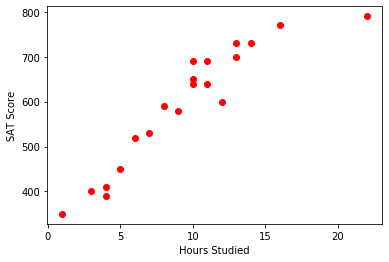

In [3]:
plt.plot(study_hours, SAT_scores, 'ro')
plt.xlabel("Hours Studied")
plt.ylabel("SAT Score")

Ignoring the outlier, there is quite a linear relationship here between hours studied, and the final SAT score.
Approximately, the rate seems to be "for every hour studied, the SAT score increases by 30, from a base of 300". Let's look at this visually:

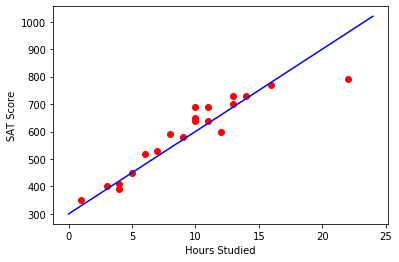

In [4]:
plt.plot(study_hours, SAT_scores, 'ro')
plt.xlabel("Hours Studied")
plt.ylabel("SAT Score")

# Here we create x values for "each hour of study" so we can plot the results
x_model = np.arange(0, 25)
y_model = x_model * 30 + 300

plt.plot(x_model, y_model, 'b-')

Quite a good fit! We can then work out our error, by using our "model" where $\beta=4$ and a constant of 300 (we will see how this fits into a model soon), on the actual hours studied, and compare that to the actual scores:

In [5]:
predicted_scores = study_hours * 30 + 300  # Same values as before - this is our "model"
error = np.sum(np.abs(predicted_scores - SAT_scores))  # The "absolute error"
print("The error is {:.2f}".format(error))

The error is 740.00


The OLS algorithm aims to minimise the squared error, which is:

In [6]:
squared_error = np.sum((predicted_scores - SAT_scores) ** 2)
print("The squared error is {:.2f}".format(squared_error))

The squared error is 56400.00


Both errors are valid to use, but the squared error is nicer from an algebraic perspective, allowing for gradients to be computed, and automatically account for positive/negative errors in the same way.

#### Exercises

1. Why wouldn't you use the actual error, that is `np.sum(predicted_scores - SAT_scores)`?
2. Try three different models (change the values 30 and 300 in the equation before). What is your best performing model?

In [7]:

# Question 1
# You wouldn't use the actual error, as the "negative" errors would cancel out the positive errors
raw_error = np.sum(predicted_scores - SAT_scores)
print(raw_error)  # note how "small" this is, compared to the absolute error


-180


In [8]:


# Question 2
# (beta, intercept)
models = [(30, 300),
          (20, 250),
          (40, 400)]

best_error = None
best_model = None

for model in models:
    print("Model is: {}".format(model))
    b, c = model
    predicted_scores = study_hours * b + c  # Same values as before - this is our "model"
    squared_error = np.sum((predicted_scores - SAT_scores) ** 2)
    print(" The squared error is {:.2f}".format(squared_error))
    
    if best_error is None or squared_error < best_error:
        best_error = squared_error
        best_model = model
        
print("The best model was {}".format(best_model))

Model is: (30, 300)
 The squared error is 56400.00
Model is: (20, 250)
 The squared error is 529100.00
Model is: (40, 400)
 The squared error is 834100.00
The best model was (30, 300)


*For solutions, see `solutions/linear_regression_intro.py`*

### Ordinary Least Squares Derivation

Here we will go through the derivation of the OLS algorithm with matrix mathematics. We will extend this further in the next notebook where we look at multivariate OLS. Before we do that, we will extend our Linear Regression Model slightly to account for our constant value (the "300" in our model for SAT scores):

$ Y = X\beta + \boldsymbol{u}$  (as before)

where $\beta = [\beta_1, \beta_2]$ and $X = [1, X]$.

In other words, $\beta$ is two values - the multiplier against the constant (hereafter just "the constant") and the value that the independent variable is multiplied against ($X\beta_2$). We extend $X$ by adding a column of 1s to it, and then use matrix multiplication, as we will review in the next notebook. This multiplies the 1s by the constant and also the independent variable by its coefficient.

The aim of OLS is to choose $\beta$ to minimise $u^2$ (the squared error), which we can do via the following equations:

$ \boldsymbol{y}  = X\beta + u$ 

$ \boldsymbol{u} = \boldsymbol{y} - X\beta $

$\boldsymbol{u}^2 = \boldsymbol{u}\boldsymbol{u} = (\boldsymbol{y} - X\beta)(\boldsymbol{y} - X\beta)$

$\boldsymbol{u}\boldsymbol{u} = \boldsymbol{y}\boldsymbol{y} - 2\boldsymbol{y}X\beta + X\beta X\beta$

Computing the partial derivative of the squared error with respect to $\beta$, and setting it to zero yields:

$\frac{ \partial(\boldsymbol{u}\boldsymbol{u})}{ \partial\beta} = 0$
$ = -2X\boldsymbol{y} + 2X^2\beta$

Solving for $\beta$ yields:

$\beta = \frac{XY}{X^2}$

<div class="alert alert-warning">
    We do <b>not</b> reduce the $X$ values - they are matrices, and the equations here will change slightly in the next notebook when we examine these values as matrices
</div>

Below, I take you through the code to do the same. There is a bit of matrix manipulation happening here that may not be familiar, however we will cover that in the next notebook. Ignoring the transposing (`.T`), inverting (`np.linalg.inv`) and some rearranging if you are not familiar with matrix maths, this is the same result as before. Also note that generally you do *not* do this yourself, instead letting an established library do it for you.

In [9]:
study_hours.shape

(20,)

In [10]:
ones = np.ones((len(study_hours)))
ones.shape

(20,)

In [11]:
X = np.vstack([ones, study_hours]).T

In [12]:
X.shape

(20, 2)

In [13]:
Y = SAT_scores.reshape((len(SAT_scores), 1))

In [14]:
X.shape, Y.shape

((20, 2), (20, 1))

In [15]:
beta = np.linalg.inv(X.T.dot(X)).dot(X.T.dot(Y))
beta

array([[353.1648795 ],
       [ 25.32646778]])

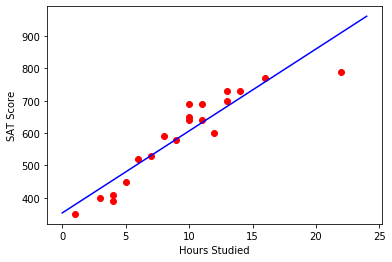

In [16]:
plt.plot(study_hours, SAT_scores, 'ro')
plt.xlabel("Hours Studied")
plt.ylabel("SAT Score")

# Here we create x values for "each hour of study" so we can plot the results
x_model = np.arange(0, 25)
y_model = x_model * beta[1] + beta[0]  # Use our learned model to fit the line of best fit.

plt.plot(x_model, y_model, 'b-')


Predicting the actual scores, we can see our trained model is better than the intuited model from earlier.

In [17]:
predicted_scores = study_hours * beta[1] + beta[0]
squared_error = np.sum((predicted_scores - SAT_scores) ** 2)
print("The squared error is {:.2f}".format(squared_error))

The squared error is 44493.56


#### Exercises

1. Remove the outlier from the data (the sample with hours studied more than 20) and rerun the analysis. What $\beta$ values do you obtain?
2. Implement and run the following algorithm:


```
loop 100 times:
    obtain a sample of 50% of the data points
    compute the beta values
    
average all beta values obtained during the loop as the final beta values
```

This is an *ensemble* learner - it is great for removing the effect of outliers, as seen in the above data.


Text(0, 0.5, 'SAT Score')

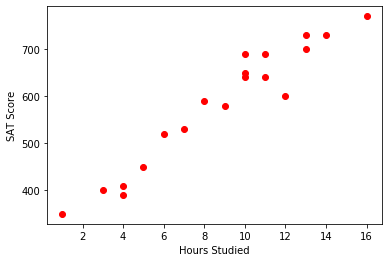

In [18]:
# Question 1
mask = study_hours < 20
study_hours_cleaned = study_hours[mask]
SAT_scores_cleaned = SAT_scores[mask]  # Don't forget to use the same mask for both X and Y

plt.plot(study_hours_cleaned, SAT_scores_cleaned, 'ro')
plt.xlabel("Hours Studied")
plt.ylabel("SAT Score")




[[313.7064505 ]
 [ 30.53639186]]


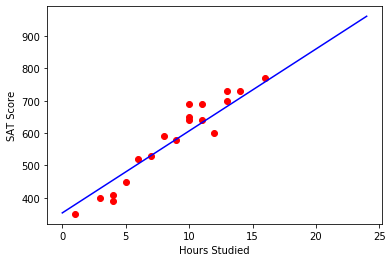

In [26]:

ones_cleaned = np.ones((len(study_hours_cleaned)))
X_cleaned = np.vstack([ones_cleaned, study_hours_cleaned]).T

Y_cleaned = SAT_scores_cleaned.reshape((len(SAT_scores_cleaned), 1))

beta_cleaned = np.linalg.inv(X_cleaned.T.dot(X_cleaned)).dot(X_cleaned.T.dot(Y_cleaned))
print(beta_cleaned)

plt.plot(study_hours_cleaned, SAT_scores_cleaned, 'ro')
plt.xlabel("Hours Studied")
plt.ylabel("SAT Score")

# Here we create x values for "each hour of study" so we can plot the results
x_model = np.arange(0, 25)
y_model = x_model * beta[1] + beta[0]  # Use our learned model to fit the line of best fit.

plt.plot(x_model, y_model, 'b-')

In [25]:

# Question 2

# Store parameter versions here
models = []

n = len(study_hours)

for i in range(1000):
    
    # Choose random indexes
    # replace=True is better statistically, we will come back to it later on...
    random_indexes = np.random.choice(np.arange(n), size=int(n/2), replace=True)
    study_hours_sample = study_hours[random_indexes]
    SAT_scores_sample = SAT_scores[random_indexes]
    
    ones_sample = np.ones((len(study_hours_sample)))
    X_sample = np.vstack([ones_sample, study_hours_sample]).T

    Y_sample = SAT_scores_sample.reshape((len(SAT_scores_sample), 1))

    beta_sample = np.linalg.inv(X_sample.T.dot(X_sample)).dot(X_sample.T.dot(Y_sample))
    models.append(beta_sample)
# Average all parameters
final_model = np.mean(models, axis=0)
print(final_model)

[[341.86599458]
 [ 27.05176317]]


*For solutions, see `solutions/ols_basic_ensemble.py`*